<a href="https://colab.research.google.com/github/Wilanth/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Midterm_643021271-2_นางสาววิลันดา ทาระมาตย์                                    
เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

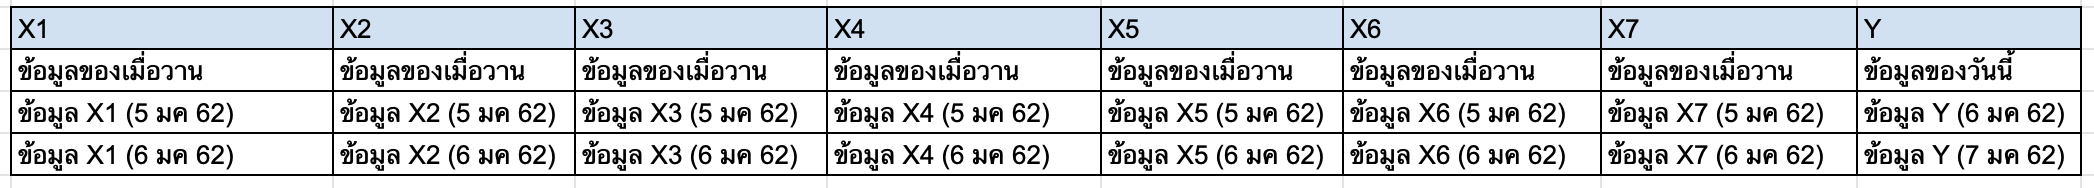

##**Import Data**

In [589]:
import numpy as np
import pandas as pd
import os

In [590]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**ความกดอากาศ(เปอร์เซ็นต์)**

In [591]:
Air_press_khonkaen = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
Air_press_nakhonphanom = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
Air_press_loei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)
Air_press_sakonnakhon = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
Air_press_nongkhai = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
Air_press_khonkaen.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


##**จำนวนเมฆ(10ส่วน)**

In [592]:
Num_clouds_khonkaen = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',header=4)
Num_clouds_nakhonphanom = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',header=4)
Num_clouds_loei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',header=4)
Num_clouds_sakonnakhon = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',header=4)
Num_clouds_nongkhai = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',header=4)
Num_clouds_loei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##**อุณหภูมิต่ำสุด(เซลเซียส)**

In [593]:
Low_temp_khonkaen = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Low_temp_nakhonphanom = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Low_temp_loei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',header=4)
Low_temp_sakonnakhon = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',header=4)
Low_temp_nongkhai = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
Low_temp_khonkaen.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22,22.2,-,-,20.1


##**ความชื้นสัมพัทธ์(เปอร์เซ็นต์)**

In [594]:
Moisture_khonkaen = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
Moisture_nakhonphanom = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
Moisture_loei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)
Moisture_sakonnakhon = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
Moisture_nongkhai = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
Moisture_khonkaen.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


##**ปริมาณฝน(มิลลิเมตร)**

In [595]:
Rainfall_khonkaen = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',header=4)
Rainfall_nakhonphanom = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',header=4)
Rainfall_loei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',header=4)
Rainfall_sakonnakhon = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',header=4)
Rainfall_nongkhai = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',header=4)
Rainfall_khonkaen.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T


##**อุณหภูมิตุ้มแห้ง(เซลเซียส)**

In [596]:
Dry_temp_khonkaen = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Dry_temp_nakhonphanom = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Dry_temp_loei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',header=4)
Dry_temp_sakonnakhon = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',header=4)
Dry_temp_nongkhai = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
Dry_temp_loei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,-,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,-,-,25.4


##**ความเร็วลม(นอต)**

In [597]:
Wind_speed_khonkaen = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',header=4)
Wind_speed_nakhonphanom = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/ความเร็วลม(นอต)/จ.นครพนม.xlsx',header=4)
Wind_speed_loei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/ความเร็วลม(นอต)/จ.เลย.xlsx',header=4)
Wind_speed_sakonnakhon = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',header=4)
Wind_speed_nongkhai = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',header=4)
Wind_speed_khonkaen.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


##**อุณหภูมิจุดน้ำค้าง(เซลเซียส)**

In [598]:
Dew_temp_khonkaen = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Dew_temp_nakhonphanom = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Dew_temp_loei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',header=4)
Dew_temp_sakonnakhon = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',header=4)
Dew_temp_nongkhai = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
Dew_temp_loei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-,17.310345


##ขั้นตอนการ Clean data

เนื่องจาก Num_clouds_loei มีจำนวน column เกินมาจึงต้องทำการตัด column ที่เกินมาออก

In [599]:
Num_clouds_loei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [600]:
Num_clouds_loei = Num_clouds_loei.drop(columns=['Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41'
,'Unnamed: 42','Unnamed: 43','Unnamed: 44'])
Num_clouds_loei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,1,1,2,4,2,3,3,1,2,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,6,4,0,1,2,2,5,3,-,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,3,1,1,0,0,1,1,4,1,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,2,4,6,5,1,2,4,9,8,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,-,-,-,0,1,3,-,3,-,2.809524


## เปลี่ยนชื่อ column ให้ตรงกับ File data

##**ความกดอากาศ(เปอร์เซ็นต์)**

In [601]:
Ap={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}
Air_press_khonkaen = Air_press_khonkaen.rename(columns=Ap)
Air_press_nakhonphanom = Air_press_nakhonphanom.rename(columns=Ap)
Air_press_loei = Air_press_loei.rename(columns=Ap)
Air_press_sakonnakhon = Air_press_sakonnakhon.rename(columns=Ap)
Air_press_nongkhai = Air_press_nongkhai.rename(columns=Ap)
Air_press_khonkaen.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


#จำนวนเมฆ

In [602]:
Nc={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}
Num_clouds_khonkaen = Num_clouds_khonkaen.rename(columns=Nc)
Num_clouds_nakhonphanom = Num_clouds_nakhonphanom.rename(columns=Nc)
Num_clouds_loei = Num_clouds_loei.rename(columns=Nc)
Num_clouds_sakonnakhon = Num_clouds_sakonnakhon.rename(columns=Nc)
Num_clouds_nongkhai = Num_clouds_nongkhai.rename(columns=Nc)
Num_clouds_loei.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,1,1,2,4,2,3,3,1,2,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,6,4,0,1,2,2,5,3,-,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,3,1,1,0,0,1,1,4,1,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,2,4,6,5,1,2,4,9,8,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,-,-,-,0,1,3,-,3,-,2.809524


#อุณหภูมิต่ำสุด

In [603]:
Lt={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}
Low_temp_khonkaen = Low_temp_khonkaen.rename(columns=Lt)
Low_temp_nakhonphanom = Low_temp_nakhonphanom.rename(columns=Lt)
Low_temp_loei = Low_temp_loei.rename(columns=Lt)
Low_temp_sakonnakhon = Low_temp_sakonnakhon.rename(columns=Lt)
Low_temp_nongkhai = Low_temp_nongkhai.rename(columns=Lt)
Low_temp_khonkaen.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22,22.2,-,-,20.1


#ความชื้นสัมพัทธ์

In [604]:
M={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}
Moisture_khonkaen = Moisture_khonkaen.rename(columns=M)
Moisture_nakhonphanom = Moisture_nakhonphanom.rename(columns=M)
Moisture_loei = Moisture_loei.rename(columns=M)
Moisture_sakonnakhon = Moisture_sakonnakhon.rename(columns=M)
Moisture_nongkhai = Moisture_nongkhai.rename(columns=M)
Moisture_khonkaen.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


#ปริมาณฝน

In [605]:
Rf={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}
Rainfall_khonkaen = Rainfall_khonkaen.rename(columns=Rf)
Rainfall_nakhonphanom = Rainfall_nakhonphanom.rename(columns=Rf)
Rainfall_loei = Rainfall_loei.rename(columns=Rf)
Rainfall_sakonnakhon = Rainfall_sakonnakhon.rename(columns=Rf)
Rainfall_nongkhai = Rainfall_nongkhai.rename(columns=Rf)
Rainfall_khonkaen.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T


#อุณหภูมิตุ้มแห้ง

In [606]:
Dt={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}
Dry_temp_khonkaen = Dry_temp_khonkaen.rename(columns=Dt)
Dry_temp_nakhonphanom = Dry_temp_nakhonphanom.rename(columns=Dt)
Dry_temp_loei = Dry_temp_loei.rename(columns=Dt)
Dry_temp_sakonnakhon = Dry_temp_sakonnakhon.rename(columns=Dt)
Dry_temp_nongkhai = Dry_temp_nongkhai.rename(columns=Dt)
Dry_temp_khonkaen.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5


#ความเร็วลม

In [607]:
Ws={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}
Wind_speed_khonkaen = Wind_speed_khonkaen.rename(columns=Ws)
Wind_speed_nakhonphanom = Wind_speed_nakhonphanom.rename(columns=Ws)
Wind_speed_loei = Wind_speed_loei.rename(columns=Ws)
Wind_speed_sakonnakhon = Wind_speed_sakonnakhon.rename(columns=Ws)
Wind_speed_nongkhai = Wind_speed_nongkhai.rename(columns=Ws)
Wind_speed_khonkaen.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


#อุณหภูมิจุดน้ำค้าง

In [608]:
Td={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}
Dew_temp_khonkaen = Dew_temp_khonkaen.rename(columns=Td)
Dew_temp_nakhonphanom = Dew_temp_nakhonphanom.rename(columns=Td)
Dew_temp_loei = Dew_temp_loei.rename(columns=Td)
Dew_temp_sakonnakhon =Dew_temp_sakonnakhon.rename(columns=Td)
Dew_temp_nongkhai = Dew_temp_nongkhai.rename(columns=Td)
Dew_temp_khonkaen.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414


#**ตรวจสอบค่า missing data และแก้ค่า missing ด้วยการแทนค่า mean**

##**ความกดอากาศ(เปอร์เซ็นต์)**

In [609]:
Air_press_khonkaen = Air_press_khonkaen.replace('-',np.NaN)
Air_press_nakhonphanom = Air_press_nakhonphanom.replace('-',np.NaN)
Air_press_loei = Air_press_loei.replace('-',np.NaN)
Air_press_sakonnakhon = Air_press_sakonnakhon.replace('-',np.NaN)
Air_press_nongkhai = Air_press_nongkhai.replace('-',np.NaN)
Air_press_khonkaen.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,NaN,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.40,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,NaN,1009.749667


In [610]:
Air_press_khonkaen.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [611]:
#พบว่ามีค่า missing อยู่ 3 ค่าคือวันที่ 29,30,31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Air_press_khonkaen['ที่'])):Air_press_khonkaen.iloc[i,:]=Air_press_khonkaen.iloc[i,:].fillna(Air_press_khonkaen.iloc[i]['เฉลี่ย'])

In [612]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Air_press_khonkaen.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [613]:
Air_press_nakhonphanom.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [614]:
#พบว่ามีค่า missing อยู่ 3 ค่าคือวันที่ 29,30,31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Air_press_nakhonphanom['ที่'])):
  Air_press_nakhonphanom.iloc[i,:]=Air_press_nakhonphanom.iloc[i,:].fillna(Air_press_nakhonphanom.iloc[i]['เฉลี่ย'])

In [615]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Air_press_nakhonphanom.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [616]:
Air_press_loei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [617]:
#พบว่ามีค่า missing อยู่ 3 ค่าคือวันที่ 29,30,31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Air_press_loei['ที่'])):Air_press_loei.iloc[i,:]=Air_press_loei.iloc[i,:].fillna(Air_press_loei.iloc[i]['เฉลี่ย'])

In [618]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Air_press_loei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [619]:
Air_press_sakonnakhon.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [620]:
#พบว่ามีค่า missing อยู่ 3 ค่าคือวันที่ 29,30,31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Air_press_sakonnakhon['ที่'])):
  Air_press_sakonnakhon.iloc[i,:]=Air_press_sakonnakhon.iloc[i,:].fillna(Air_press_sakonnakhon.iloc[i]['เฉลี่ย'])

In [621]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Air_press_sakonnakhon.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [622]:
Air_press_nongkhai.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [623]:
#พบว่ามีค่า missing อยู่ 3 ค่าคือวันที่ 29,30,31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Air_press_nongkhai['ที่'])):Air_press_nongkhai.iloc[i,:]=Air_press_nongkhai.iloc[i,:].fillna(Air_press_nongkhai.iloc[i]['เฉลี่ย'])

In [624]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Air_press_nongkhai.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

#จำนวนเมฆ

In [625]:
Num_clouds_khonkaen = Num_clouds_khonkaen.replace('-',np.NaN)
Num_clouds_nakhonphanom = Num_clouds_nakhonphanom.replace('-',np.NaN)
Num_clouds_loei = Num_clouds_loei.replace('-',np.NaN)
Num_clouds_sakonnakhon = Num_clouds_sakonnakhon.replace('-',np.NaN)
Num_clouds_nongkhai = Num_clouds_nongkhai.replace('-',np.NaN)
Num_clouds_loei.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8.0,10.0,10.0,9.0,8.0,10.0,10.0,...,1.0,1.0,2.0,4.0,2.0,3.0,3.0,1.0,2.0,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,1.0,2.0,1.0,1.0,1.0,2.0,...,6.0,4.0,0.0,1.0,2.0,2.0,5.0,3.0,NaN,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.0,3.0,1.0,3.0,3.0,2.0,3.0,...,3.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,3.0,6.0,6.0,2.0,1.0,...,2.0,4.0,6.0,5.0,1.0,2.0,4.0,9.0,8.0,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8.0,5.0,10.0,7.0,1.0,0.0,NaN,...,NaN,NaN,NaN,0.0,1.0,3.0,NaN,3.0,NaN,2.809524


In [626]:
Num_clouds_khonkaen.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3            True
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21           True
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [627]:
#พบว่ามีค่า missing อยู่ 5 ค่าคือวันที่ 3,21,29,30,31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Num_clouds_khonkaen['ที่'])):Num_clouds_khonkaen.iloc[i,:]=Num_clouds_khonkaen.iloc[i,:].fillna(Num_clouds_khonkaen.iloc[i]['เฉลี่ย'])

In [628]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Num_clouds_khonkaen.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [629]:
Num_clouds_nakhonphanom.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11          False
12          False
13           True
14           True
15           True
16          False
17          False
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26          False
27           True
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [630]:
#พบว่ามีค่า missing อยู่ 25 ค่าคือวันที่ 1-10,13-15,18-25,27,29-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Num_clouds_nakhonphanom['ที่'])):
  Num_clouds_nakhonphanom.iloc[i,:]=Num_clouds_nakhonphanom.iloc[i,:].fillna(Num_clouds_nakhonphanom.iloc[i]['เฉลี่ย'])

In [631]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Num_clouds_nakhonphanom.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [632]:
Num_clouds_loei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [633]:
#พบว่ามีค่า missing อยู่ 31 ค่าคือวันที่ 1-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Num_clouds_loei['ที่'])):Num_clouds_loei.iloc[i,:]=Num_clouds_loei.iloc[i,:].fillna(Num_clouds_loei.iloc[i]['เฉลี่ย'])

In [634]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Num_clouds_loei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [635]:
Num_clouds_sakonnakhon.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [636]:
#พบว่ามีค่า missing อยู่ 31 ค่าคือวันที่ 1-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Num_clouds_sakonnakhon['ที่'])):
  Num_clouds_sakonnakhon.iloc[i,:]=Num_clouds_sakonnakhon.iloc[i,:].fillna(Num_clouds_sakonnakhon.iloc[i]['เฉลี่ย'])

In [637]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Num_clouds_sakonnakhon.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [638]:
Num_clouds_nongkhai.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [639]:
#พบว่ามีค่า missing อยู่ 31 ค่าคือวันที่ 1-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Num_clouds_nongkhai['ที่'])):Num_clouds_nongkhai.iloc[i,:]=Num_clouds_nongkhai.iloc[i,:].fillna(Num_clouds_nongkhai.iloc[i]['เฉลี่ย'])

In [640]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Num_clouds_nongkhai.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

#อุณหภูมิต่ำสุด

In [641]:
Low_temp_khonkaen = Low_temp_khonkaen.replace('-',np.NaN)
Low_temp_nakhonphanom = Low_temp_nakhonphanom.replace('-',np.NaN)
Low_temp_loei = Low_temp_loei.replace('-',np.NaN)
Low_temp_sakonnakhon = Low_temp_sakonnakhon.replace('-',np.NaN)
Low_temp_nongkhai = Low_temp_nongkhai.replace('-',np.NaN)
Low_temp_khonkaen.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22.0,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,NaN,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17.0,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22.0,22.2,NaN,NaN,20.1


In [642]:
Low_temp_khonkaen.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25          False
26          False
27           True
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [643]:
#พบว่ามีค่า missing อยู่ 12 ค่าคือวันที่ 18-24,27-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Low_temp_khonkaen['ที่'])):Low_temp_khonkaen.iloc[i,:]=Low_temp_khonkaen.iloc[i,:].fillna(Low_temp_khonkaen.iloc[i]['เฉลี่ย'])

In [644]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Low_temp_khonkaen.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [645]:
Low_temp_nakhonphanom.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5            True
6           False
7           False
8           False
9           False
10          False
11           True
12          False
13          False
14          False
15          False
16           True
17           True
18           True
19           True
20          False
21           True
22           True
23           True
24          False
25           True
26          False
27          False
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [646]:
#พบว่ามีค่า missing อยู่ 14 ค่าคือวันที่ 5,11,16-19,21-23,25,28-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Low_temp_nakhonphanom['ที่'])):
  Low_temp_nakhonphanom.iloc[i,:]=Low_temp_nakhonphanom.iloc[i,:].fillna(Low_temp_nakhonphanom.iloc[i]['เฉลี่ย'])

In [647]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Low_temp_nakhonphanom.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [648]:
Low_temp_loei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12           True
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [649]:
#พบว่ามีค่า missing อยู่ 6 ค่าคือวันที่ 1,12,28-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Low_temp_loei['ที่'])):Low_temp_loei.iloc[i,:]=Low_temp_loei.iloc[i,:].fillna(Low_temp_loei.iloc[i]['เฉลี่ย'])

In [650]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Low_temp_loei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [651]:
Low_temp_sakonnakhon.isnull().any()

ที่          True
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21           True
22          False
23          False
24          False
25          False
26          False
27          False
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [652]:
#พบว่ามีค่า missing อยู่ 6 ค่าคือ ที่ วันที่ 21,28-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Low_temp_sakonnakhon['ที่'])):
  Low_temp_sakonnakhon.iloc[i,:]=Low_temp_sakonnakhon.iloc[i,:].fillna(Low_temp_sakonnakhon.iloc[i]['เฉลี่ย'])

In [653]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Low_temp_sakonnakhon.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [654]:
Low_temp_nongkhai.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [655]:
#พบว่ามีค่า missing อยู่ 4 ค่าคือวันที่ 28-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Low_temp_nongkhai['ที่'])):Low_temp_nongkhai.iloc[i,:]=Low_temp_nongkhai.iloc[i,:].fillna(Low_temp_nongkhai.iloc[i]['เฉลี่ย'])

In [656]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Low_temp_nongkhai.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

#ความชื้นสัมพัทธ์

In [657]:
Moisture_khonkaen = Moisture_khonkaen.replace('-',np.NaN)
Moisture_nakhonphanom = Moisture_nakhonphanom.replace('-',np.NaN)
Moisture_loei = Moisture_loei.replace('-',np.NaN)
Moisture_sakonnakhon = Moisture_sakonnakhon.replace('-',np.NaN)
Moisture_nongkhai = Moisture_nongkhai.replace('-',np.NaN)
Moisture_khonkaen.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71.0,71.0,68.0,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67.0,65.0,NaN,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66.0,63.0,64.0,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70.0,67.0,68.0,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68.0,NaN,NaN,65


In [658]:
Moisture_khonkaen.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [659]:
#พบว่ามีค่า missing อยู่ 3 ค่าคือวันที่ 29-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Moisture_khonkaen['ที่'])):Moisture_khonkaen.iloc[i,:]=Moisture_khonkaen.iloc[i,:].fillna(Moisture_khonkaen.iloc[i]['เฉลี่ย'])

In [660]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Moisture_khonkaen.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [661]:
Moisture_nakhonphanom.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [662]:
#พบว่ามีค่า missing อยู่ 3 ค่าคือวันที่ 29-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Moisture_nakhonphanom['ที่'])):
  Moisture_nakhonphanom.iloc[i,:]=Moisture_nakhonphanom.iloc[i,:].fillna(Moisture_nakhonphanom.iloc[i]['เฉลี่ย'])

In [663]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Low_temp_nakhonphanom.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [664]:
Moisture_loei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [665]:
#พบว่ามีค่า missing อยู่ 3 ค่าคือวันที่ 29-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Moisture_loei['ที่'])):Moisture_loei.iloc[i,:]=Moisture_loei.iloc[i,:].fillna(Moisture_loei.iloc[i]['เฉลี่ย'])

In [666]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Low_temp_loei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [667]:
Moisture_sakonnakhon.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [668]:
#พบว่ามีค่า missing อยู่ 3 ค่าคือวันที่ 29-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Moisture_sakonnakhon['ที่'])):
  Moisture_sakonnakhon.iloc[i,:]=Moisture_sakonnakhon.iloc[i,:].fillna(Moisture_sakonnakhon.iloc[i]['เฉลี่ย'])

In [669]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Low_temp_sakonnakhon.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [670]:
Moisture_nongkhai.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [671]:
#พบว่ามีค่า missing อยู่ 3 ค่าคือวันที่ 29-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Moisture_nongkhai['ที่'])):Moisture_nongkhai.iloc[i,:]=Moisture_nongkhai.iloc[i,:].fillna(Moisture_nongkhai.iloc[i]['เฉลี่ย'])

In [672]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Low_temp_nongkhai.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

#ปริมาณฝน

In [673]:
Rainfall_khonkaen = Rainfall_khonkaen.replace('-',np.NaN)
Rainfall_nakhonphanom = Rainfall_nakhonphanom.replace('-',np.NaN)
Rainfall_loei = Rainfall_loei.replace('-',np.NaN)
Rainfall_sakonnakhon = Rainfall_sakonnakhon.replace('-',np.NaN)
Rainfall_nongkhai = Rainfall_nongkhai.replace('-',np.NaN)
Rainfall_khonkaen.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0.0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,NaN,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,0,NaN
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0.0,T,0,0,0,0,...,0,0,0,0,0,0.0,0.0,NaN,NaN,T


In [674]:
Rainfall_khonkaen.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [675]:
#พบว่ามีค่า missing อยู่ 32 ค่าคือวันที่ 1-31,ค่าเฉลี่ย ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Rainfall_khonkaen['ที่'])):Rainfall_khonkaen.iloc[i,:]=Rainfall_khonkaen.iloc[i,:].fillna(Rainfall_khonkaen.iloc[i]['เฉลี่ย'])

In [676]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Rainfall_khonkaen.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0.0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,11.8,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,0,NaN
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0.0,T,0,0,0,0,...,0,0,0,0,0,0.0,0.0,T,T,T


In [677]:
Rainfall_nakhonphanom.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [678]:
#พบว่ามีค่า missing อยู่ 32 ค่าคือวันที่ 1-31,ค่าเฉลี่ย ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Rainfall_nakhonphanom['ที่'])):
  Rainfall_nakhonphanom.iloc[i,:]=Rainfall_nakhonphanom.iloc[i,:].fillna(Rainfall_nakhonphanom.iloc[i]['เฉลี่ย'])

In [679]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Rainfall_nakhonphanom.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0.0,0,0.0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0.0,0,0,T,T,0,...,0,0,0,0,0.5,0,0.0,0,0.5,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0,0,NaN
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0.0,0,0,0,0,0,...,2.3,0,0,0,0.0,0,0.0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0.0,T,0,0,0,0,...,0,0,0,0,1.2,0,0.0,1.2,1.2,1.2


In [680]:
Rainfall_loei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [681]:
#พบว่ามีค่า missing อยู่ 32 ค่าคือวันที่ 1-31,ค่าเฉลี่ย ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Rainfall_loei['ที่'])):Rainfall_loei.iloc[i,:]=Rainfall_loei.iloc[i,:].fillna(Rainfall_loei.iloc[i]['เฉลี่ย'])

In [682]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Rainfall_loei.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0.0,0,3.4,1.8,...,0.0,0,0.0,0.0,0,0.2,0.0,0,0.0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0.6,0.0,0,7.4,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,T,0.0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,1,0.0,0.0,2.4,2.4,2.4


In [683]:
Rainfall_sakonnakhon.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [684]:
#พบว่ามีค่า missing อยู่ 32 ค่าคือวันที่ 1-31,ค่าเฉลี่ย ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Rainfall_sakonnakhon['ที่'])):
  Rainfall_sakonnakhon.iloc[i,:]=Rainfall_sakonnakhon.iloc[i,:].fillna(Rainfall_sakonnakhon.iloc[i]['เฉลี่ย'])

In [685]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Rainfall_sakonnakhon.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,T,5.5,0.3,0,...,0.0,0,0.0,0,0,0,1.0,0,0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0.0,0.0,0.0,0,T,T,2.8,...,0.0,0,0.0,0,0,0,0.0,0,2.8,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0.0,0.0,0.0,0,0,0,0,...,0.0,0,0.0,0,0,0,0.0,0,0,NaN
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0.0,0.0,0.0,0,0,0,0,...,0.9,0,0.0,0,0,0,0.0,0,0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0.0,0.0,0.0,0,0,0,0,...,0.0,0,0.0,0.4,5.6,0,0.0,6,6,6


In [686]:
Rainfall_nongkhai.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [687]:
#พบว่ามีค่า missing อยู่ 32 ค่าคือวันที่ 1-31,ค่าเฉลี่ย ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Rainfall_nongkhai['ที่'])):Rainfall_nongkhai.iloc[i,:]=Rainfall_nongkhai.iloc[i,:].fillna(Rainfall_nongkhai.iloc[i]['เฉลี่ย'])

In [688]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Rainfall_nongkhai.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,5.1,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0.0,0.0,0.0,0.0,1.1,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0.0,28.7,9.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,6.1,0.0,0.0,43.9,43.9,43.9


#แก้ข้อมูลที่เป็นตัว T (T : Trace ) หมายถึง ฝนวัดไม่ได้หรือ ปริมาณน้ำฝนต่ำกว่า 0.1 มม.
แทนค่า T ด้วยค่าสูงสุดที่วัดปริมาณฝนได้ คือ 0.1 มม.

In [689]:
Rainfall_khonkaen = Rainfall_khonkaen.replace('T',np.NaN)
Rainfall_nakhonphanom = Rainfall_nakhonphanom.replace('T',np.NaN)
Rainfall_loei = Rainfall_loei.replace('T',np.NaN)
Rainfall_sakonnakhon = Rainfall_sakonnakhon.replace('T',np.NaN)
Rainfall_nongkhai = Rainfall_nongkhai.replace('T',np.NaN)

In [690]:
Rainfall_khonkaen.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [691]:
Rainfall_nakhonphanom.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27          False
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [692]:
Rainfall_loei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [693]:
Rainfall_sakonnakhon.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [694]:
Rainfall_nongkhai.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [695]:
Rainfall_khonkaen.fillna(0.1, inplace=True)
Rainfall_nakhonphanom.fillna(0.1, inplace=True)
Rainfall_loei.fillna(0.1, inplace=True)
Rainfall_sakonnakhon.fillna(0.1, inplace=True)
Rainfall_nongkhai.fillna(0.1, inplace=True)

In [696]:
Rainfall_khonkaen.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [697]:
Rainfall_khonkaen.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3.0,0.0,2.2,0.5,1.3,...,0.0,0.0,0.1,0.0,0.5,1.1,0.0,0.0,0.0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.8,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1


In [698]:
Rainfall_nakhonphanom.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [699]:
Rainfall_nakhonphanom.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17.0,0.3,0.0,0.3,1.9,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.2,0.0,0.0,1.2,1.2,1.2


In [700]:
Rainfall_loei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [701]:
Rainfall_loei.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0.0,0.0,3.4,1.8,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,183.0
1,2,353201-เลย จ.เลย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,7.4,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0.0,0.2,1.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.4,2.4,2.4


In [702]:
Rainfall_sakonnakhon.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [703]:
Rainfall_sakonnakhon.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,0.1,5.5,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.4,5.6,0.0,0.0,6.0,6.0,6.0


In [704]:
Rainfall_nongkhai.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [705]:
Rainfall_nongkhai.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.1,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0.0,0.0,0.0,0.0,1.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0.0,28.7,9.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.1,0.0,0.0,43.9,43.9,43.9


#อุณหภูมิตุ้มแห้ง

In [706]:
Dry_temp_khonkaen = Dry_temp_khonkaen.replace('-',np.NaN)
Dry_temp_nakhonphanom = Dry_temp_nakhonphanom.replace('-',np.NaN)
Dry_temp_loei = Dry_temp_loei.replace('-',np.NaN)
Dry_temp_sakonnakhon = Dry_temp_sakonnakhon.replace('-',np.NaN)
Dry_temp_nongkhai = Dry_temp_nongkhai.replace('-',np.NaN)
Dry_temp_khonkaen.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26.0,26.0,NaN,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23.0,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,NaN,NaN,26.5


In [707]:
Dry_temp_khonkaen.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [708]:
#พบว่ามีค่า missing อยู่ 3 ค่าคือวันที่ 29-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Dry_temp_khonkaen['ที่'])):Dry_temp_khonkaen.iloc[i,:]=Dry_temp_khonkaen.iloc[i,:].fillna(Dry_temp_khonkaen.iloc[i]['เฉลี่ย'])

In [709]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Dry_temp_khonkaen.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [710]:
Dry_temp_nakhonphanom.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [711]:
#พบว่ามีค่า missing อยู่ 3 ค่าคือวันที่ 29-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Dry_temp_nakhonphanom['ที่'])):
  Dry_temp_nakhonphanom.iloc[i,:]=Dry_temp_nakhonphanom.iloc[i,:].fillna(Dry_temp_nakhonphanom.iloc[i]['เฉลี่ย'])

In [712]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Dry_temp_nakhonphanom.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [713]:
Dry_temp_loei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [714]:
#พบว่ามีค่า missing อยู่ 3 ค่าคือวันที่ 29-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Dry_temp_loei['ที่'])):Dry_temp_loei.iloc[i,:]=Dry_temp_loei.iloc[i,:].fillna(Dry_temp_loei.iloc[i]['เฉลี่ย'])

In [715]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Dry_temp_loei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [716]:
Dry_temp_sakonnakhon.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [717]:
#พบว่ามีค่า missing อยู่ 3 ค่าคือวันที่ 29-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Dry_temp_sakonnakhon['ที่'])):
  Dry_temp_sakonnakhon.iloc[i,:]=Dry_temp_khonkaen.iloc[i,:].fillna(Dry_temp_sakonnakhon.iloc[i]['เฉลี่ย'])

In [718]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Dry_temp_sakonnakhon.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [719]:
Dry_temp_nongkhai.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [720]:
#พบว่ามีค่า missing อยู่ 3 ค่าคือวันที่ 29-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Dry_temp_nongkhai['ที่'])):Dry_temp_nongkhai.iloc[i,:]=Dry_temp_nongkhai.iloc[i,:].fillna(Dry_temp_nongkhai.iloc[i]['เฉลี่ย'])

In [721]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Dry_temp_nongkhai.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

#ความเร็วลม

In [722]:
Wind_speed_khonkaen = Wind_speed_khonkaen.replace('-',np.NaN)
Wind_speed_nakhonphanom = Wind_speed_nakhonphanom.replace('-',np.NaN)
Wind_speed_loei = Wind_speed_loei.replace('-',np.NaN)
Wind_speed_sakonnakhon = Wind_speed_sakonnakhon.replace('-',np.NaN)
Wind_speed_nongkhai = Wind_speed_nongkhai.replace('-',np.NaN)
Wind_speed_khonkaen.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3.0,2,2,3,4,...,2,3,5,5,5,4,6.0,4.0,5.0,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3.0,3,5,2,3,...,7,6,5,5,3,1,3.0,3.0,NaN,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4.0,4,4,4,4,...,5,6,7,6,5,4,4.0,6.0,5.0,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1.0,4,4,2,4,...,3,3,4,2,2,1,3.0,4.0,4.0,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3.0,2,3,1,2,...,1,2,3,2,4,3,3.0,3.0,NaN,2.566667


In [723]:
Wind_speed_khonkaen.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3            True
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21           True
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [724]:
#พบว่ามีค่า missing อยู่ 5 ค่าคือวันที่ 3,21,29-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Wind_speed_khonkaen['ที่'])):
  Wind_speed_khonkaen.iloc[i,:]=Wind_speed_khonkaen.iloc[i,:].fillna(Wind_speed_khonkaen.iloc[i]['เฉลี่ย'])

In [725]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Wind_speed_khonkaen.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [726]:
Wind_speed_nakhonphanom.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4            True
5            True
6           False
7            True
8            True
9           False
10           True
11           True
12           True
13          False
14          False
15           True
16           True
17          False
18           True
19          False
20           True
21           True
22           True
23          False
24           True
25           True
26          False
27          False
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [727]:
#พบว่ามีค่า missing อยู่ 19 ค่าคือวันที่ 4-5,7-8,10-12,15-16,18,20-22,24-25,28-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Wind_speed_nakhonphanom['ที่'])):
  Wind_speed_nakhonphanom.iloc[i,:]=Wind_speed_nakhonphanom.iloc[i,:].fillna(Wind_speed_nakhonphanom.iloc[i]['เฉลี่ย'])

In [728]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Wind_speed_nakhonphanom.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [729]:
Wind_speed_loei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5            True
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16           True
17          False
18          False
19           True
20          False
21          False
22          False
23          False
24           True
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [730]:
#พบว่ามีค่า missing อยู่ 7 ค่าคือวันที่ 5,16,19,24,29-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Wind_speed_loei['ที่'])):
  Wind_speed_loei.iloc[i,:]=Wind_speed_loei.iloc[i,:].fillna(Wind_speed_loei.iloc[i]['เฉลี่ย'])

In [731]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Wind_speed_loei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [732]:
Wind_speed_sakonnakhon.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4            True
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20           True
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [733]:
#พบว่ามีค่า missing อยู่ 5 ค่าคือวันที่ 4,20,29-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Wind_speed_sakonnakhon['ที่'])):
  Wind_speed_sakonnakhon.iloc[i,:]=Wind_speed_sakonnakhon.iloc[i,:].fillna(Wind_speed_sakonnakhon.iloc[i]['เฉลี่ย'])

In [734]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Wind_speed_sakonnakhon.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [735]:
Wind_speed_nongkhai.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4            True
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [736]:
#พบว่ามีค่า missing อยู่ 4 ค่าคือวันที่ 4,29-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Wind_speed_nongkhai['ที่'])):
  Wind_speed_nongkhai.iloc[i,:]=Wind_speed_nongkhai.iloc[i,:].fillna(Wind_speed_nongkhai.iloc[i]['เฉลี่ย'])

In [737]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Wind_speed_nongkhai.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

#อุณหภูมิจุดน้ำค้าง

In [738]:
Dew_temp_khonkaen = Dew_temp_khonkaen.replace('-',np.NaN)
Dew_temp_nakhonphanom = Dew_temp_nakhonphanom.replace('-',np.NaN)
Dew_temp_loei = Dew_temp_loei.replace('-',np.NaN)
Dew_temp_sakonnakhon =Dew_temp_sakonnakhon.replace('-',np.NaN)
Dew_temp_nongkhai = Dew_temp_nongkhai.replace('-',np.NaN)
Dew_temp_khonkaen.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19.0,18.3,NaN,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,NaN,NaN,18.772414


In [739]:
Dew_temp_khonkaen.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [740]:
#พบว่ามีค่า missing อยู่ 3 ค่าคือวันที่ 29-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Dew_temp_khonkaen['ที่'])):
  Dew_temp_khonkaen.iloc[i,:]=Dew_temp_khonkaen.iloc[i,:].fillna(Dew_temp_khonkaen.iloc[i]['เฉลี่ย'])

In [741]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Dew_temp_khonkaen.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [742]:
Dew_temp_nakhonphanom.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [743]:
#พบว่ามีค่า missing อยู่ 3 ค่าคือวันที่ 29-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Dew_temp_nakhonphanom['ที่'])):
  Dew_temp_nakhonphanom.iloc[i,:]=Dew_temp_nakhonphanom.iloc[i,:].fillna(Dew_temp_nakhonphanom.iloc[i]['เฉลี่ย'])

In [744]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Dew_temp_nakhonphanom.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [745]:
Dew_temp_loei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [746]:
#พบว่ามีค่า missing อยู่ 3 ค่าคือวันที่ 29-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Dew_temp_loei['ที่'])):
  Dew_temp_loei.iloc[i,:]=Dew_temp_loei.iloc[i,:].fillna(Dew_temp_loei.iloc[i]['เฉลี่ย'])

In [747]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Dew_temp_loei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [748]:
Dew_temp_sakonnakhon.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [749]:
#พบว่ามีค่า missing อยู่ 3 ค่าคือวันที่ 29-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Dew_temp_sakonnakhon['ที่'])):
  Dew_temp_sakonnakhon.iloc[i,:]=Dew_temp_sakonnakhon.iloc[i,:].fillna(Dew_temp_sakonnakhon.iloc[i]['เฉลี่ย'])

In [750]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Dew_temp_sakonnakhon.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [751]:
Dew_temp_nongkhai.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [752]:
#พบว่ามีค่า missing อยู่ 3 ค่าคือวันที่ 29-31 ดังนั้นจะทำการแทนค่าว่างด้วยค่า mean ของแต่ละแถว
for i in range(len(Dew_temp_nongkhai['ที่'])):
  Dew_temp_nongkhai.iloc[i,:]=Dew_temp_nongkhai.iloc[i,:].fillna(Dew_temp_nongkhai.iloc[i]['เฉลี่ย'])

In [753]:
#เช็คดูว่าหลังแทนค่าว่างด้วยค่า mean แล้วยังมี missing อยู่หรือไม่
Dew_temp_nongkhai.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

###จังหวัดเลยที่มี column ไม่ครบ
Dew_temp (อุณหภูมิจุดน้ำค้าง) และ Dry_temp (อุณหภูมิตุ้มแห้ง) มี 50 แถว ในขณะที่ลักษณะอื่นๆ มี 55 แถว ก็คือ Row หายไป 5 row

In [771]:
Dt=Dew_temp_loei.iloc[:,3:35].mean().tolist()
Td=Dry_temp_loei.iloc[:,3:35].mean().tolist()

In [772]:
R1=Rainfall_loei.iloc[50:,:3]
R2=Rainfall_loei.iloc[50:,:3]

In [773]:
L=[]
for i in range(33):
  if i != 0:
    K = i
    L.append(i)

In [774]:
for i in range(32):
  R1[L[i]] = Dt[i]
for i in range(32):
  R2[L[i]] = Td[i]

In [775]:
R2

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,32
50,48,353201-เลย จ.เลย,2021-10-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,...,24.566,24.228,24.19,24.188,24.132,24.446,24.236,24.112,23.984,24.246
51,49,353201-เลย จ.เลย,2021-11-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,...,24.566,24.228,24.19,24.188,24.132,24.446,24.236,24.112,23.984,24.246
52,50,353201-เลย จ.เลย,2021-12-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,...,24.566,24.228,24.19,24.188,24.132,24.446,24.236,24.112,23.984,24.246
53,1,353201-เลย จ.เลย,2022-01-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,...,24.566,24.228,24.19,24.188,24.132,24.446,24.236,24.112,23.984,24.246
54,2,353201-เลย จ.เลย,2022-02-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,...,24.566,24.228,24.19,24.188,24.132,24.446,24.236,24.112,23.984,24.246


In [776]:
Dew_temp_loei=pd.concat([Dew_temp_loei,R1])
Dry_temp_loei=pd.concat([Dry_temp_loei,R2])

##แยก เดือน ปี เป็นอีก Column ใหม่

##**ความกดอากาศ(เปอร์เซ็นต์)**

In [777]:
year=[]
mon=[]
for i in range(len(Dry_temp_khonkaen['เดือน/ปี'])) :
  L = str(Dry_temp_khonkaen['เดือน/ปี'][i]).split(' ')[0].split('-')[0]
  T = str(Dry_temp_khonkaen['เดือน/ปี'][i]).split(' ')[0].split('-')[1]
  year.append(L)
  mon.append(T)

In [797]:
Air_press_khonkaen['ปี']=year
Air_press_khonkaen['เดือน']=mon
Air_press_nakhonphanom['ปี']=year
Air_press_nakhonphanom['เดือน']=mon
Air_press_loei['ปี']=year
Air_press_loei['เดือน']=mon
Air_press_sakonnakhon['ปี']=year
Air_press_sakonnakhon['เดือน']=mon
Air_press_nongkhai['ปี']=year
Air_press_nongkhai['เดือน']=mon

##**จำนวนเมฆ(10ส่วน)**

In [798]:
Num_clouds_khonkaen['ปี']=year
Num_clouds_khonkaen['เดือน']=mon
Num_clouds_nakhonphanom['ปี']=year
Num_clouds_nakhonphanom['เดือน']=mon
Num_clouds_loei['ปี']=year
Num_clouds_loei['เดือน']=mon
Num_clouds_sakonnakhon['ปี']=year
Num_clouds_sakonnakhon['เดือน']=mon
Num_clouds_nongkhai['ปี']=year
Num_clouds_nongkhai['เดือน']=mon

##**อุณหภูมิต่ำสุด(เซลเซียส)**

In [799]:
Low_temp_khonkaen['ปี']=year
Low_temp_khonkaen['เดือน']=mon
Low_temp_nakhonphanom['ปี']=year
Low_temp_nakhonphanom['เดือน']=mon
Low_temp_loei['ปี']=year
Low_temp_loei['เดือน']=mon
Low_temp_sakonnakhon['ปี']=year
Low_temp_sakonnakhon['เดือน']=mon
Low_temp_nongkhai['ปี']=year
Low_temp_nongkhai['เดือน']=mon

##**ความชื้นสัมพัทธ์(เปอร์เซ็นต์)**

In [800]:
Moisture_khonkaen['ปี']=year
Moisture_khonkaen['เดือน']=mon
Moisture_nakhonphanom['ปี']=year
Moisture_nakhonphanom['เดือน']=mon
Moisture_loei['ปี']=year
Moisture_loei['เดือน']=mon
Moisture_sakonnakhon['ปี']=year
Moisture_sakonnakhon['เดือน']=mon
Moisture_nongkhai['ปี']=year
Moisture_nongkhai['เดือน']=mon

##**ปริมาณฝน(มิลลิเมตร)**

In [801]:
Rainfall_khonkaen['ปี']=year
Rainfall_khonkaen['เดือน']=mon
Rainfall_nakhonphanom['ปี']=year
Rainfall_nakhonphanom['เดือน']=mon
Rainfall_loei['ปี']=year
Rainfall_loei['เดือน']=mon
Rainfall_sakonnakhon['ปี']=year
Rainfall_sakonnakhon['เดือน']=mon
Rainfall_nongkhai['ปี']=year
Rainfall_nongkhai['เดือน']=mon

##**อุณหภูมิตุ้มแห้ง(เซลเซียส)**

In [792]:
Dry_temp_loei = Dry_temp_loei.drop(49, axis=0)
Dry_temp_loei.reset_index(drop=True) # Reset index

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,26,27,28,29,30,31,เฉลี่ย,32,ปี,เดือน
0,1,353201-เลย จ.เลย,2011-10-01,26.300,25.100,24.40,25.200,25.600,23.70,24.60,...,26.200,25.900,25.600,26.300,25.600,24.800,25.6,NaN,2011,10
1,2,353201-เลย จ.เลย,2011-11-01,25.300,24.700,24.50,24.400,24.900,25.40,25.80,...,23.300,24.500,24.100,25.500,25.500,24.400,24.4,NaN,2011,11
2,3,353201-เลย จ.เลย,2011-12-01,23.900,22.900,21.00,20.900,22.300,21.60,23.80,...,16.400,17.600,21.100,22.700,22.600,23.200,21.1,NaN,2011,12
3,1,353201-เลย จ.เลย,2012-01-01,22.700,22.900,24.10,24.300,23.300,23.00,22.20,...,22.800,23.400,24.900,25.500,23.500,23.500,23.3,NaN,2012,01
4,2,353201-เลย จ.เลย,2012-02-01,23.400,24.200,23.20,24.000,25.600,26.30,25.90,...,26.800,26.500,26.700,26.700,25.400,25.400,25.4,NaN,2012,02
5,3,353201-เลย จ.เลย,2012-10-01,26.400,26.900,25.30,25.900,26.600,26.30,26.30,...,26.800,27.400,27.400,27.900,27.900,27.400,26.8,NaN,2012,10
6,4,353201-เลย จ.เลย,2012-11-01,26.100,25.300,26.20,26.200,26.900,27.30,27.80,...,26.600,25.600,25.200,25.800,26.700,26.700,26.7,NaN,2012,11
7,5,353201-เลย จ.เลย,2012-12-01,27.600,27.600,25.80,26.600,26.400,25.40,24.90,...,23.000,24.600,24.400,24.600,24.400,20.300,24.5,NaN,2012,12
8,6,353201-เลย จ.เลย,2013-01-01,19.500,22.200,23.80,23.200,22.200,21.60,21.80,...,25.000,23.100,22.000,23.600,24.000,21.500,22.9,NaN,2013,01
9,7,353201-เลย จ.เลย,2013-02-01,22.300,23.400,23.80,25.900,25.900,26.90,27.40,...,28.400,29.600,29.000,26.400,26.400,26.400,26.4,NaN,2013,02


In [802]:
Dry_temp_khonkaen['ปี']=year
Dry_temp_khonkaen['เดือน']=mon
Dry_temp_nakhonphanom['ปี']=year
Dry_temp_nakhonphanom['เดือน']=mon
Dry_temp_loei['ปี']=year
Dry_temp_loei['เดือน']=mon
Dry_temp_sakonnakhon['ปี']=year
Dry_temp_sakonnakhon['เดือน']=mon
Dry_temp_nongkhai['ปี']=year
Dry_temp_nongkhai['เดือน']=mon

##**ความเร็วลม(นอต)**

In [803]:
Wind_speed_khonkaen['ปี']=year
Wind_speed_khonkaen['เดือน']=mon
Wind_speed_nakhonphanom['ปี']=year
Wind_speed_nakhonphanom['เดือน']=mon
Wind_speed_loei['ปี']=year
Wind_speed_loei['เดือน']=mon
Wind_speed_sakonnakhon['ปี']=year
Wind_speed_sakonnakhon['เดือน']=mon
Wind_speed_nongkhai['ปี']=year
Wind_speed_nongkhai['เดือน']=mon

##**อุณหภูมิจุดน้ำค้าง(เซลเซียส)**

In [788]:
Dew_temp_loei = Dew_temp_loei.drop(51, axis=0)
Dew_temp_loei.reset_index(drop=True) # Reset index

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,เฉลี่ย,32
0,1,353201-เลย จ.เลย,2011-10-01,23.600,23.500,21.90,21.900,21.800,21.60,21.70,...,21.500,21.20,21.000,21.60,21.300,21.000000,20.200000,20.200000,21.793548,NaN
1,2,353201-เลย จ.เลย,2011-11-01,20.100,19.500,19.50,19.100,19.500,20.50,20.60,...,17.000,16.70,17.500,18.80,19.200,19.500000,19.400000,18.953333,18.953333,NaN
2,3,353201-เลย จ.เลย,2011-12-01,18.000,16.600,15.00,14.600,15.300,16.70,18.90,...,12.800,9.70,9.400,11.00,14.900,16.200000,16.200000,16.500000,14.735484,NaN
3,1,353201-เลย จ.เลย,2012-01-01,16.200,16.400,17.60,18.200,15.200,16.10,17.00,...,18.700,18.50,16.900,17.60,18.500,19.200000,18.200000,17.400000,16.851613,NaN
4,2,353201-เลย จ.เลย,2012-02-01,17.800,18.800,20.70,19.100,19.500,18.20,16.40,...,16.300,17.10,16.700,18.70,18.600,16.900000,17.310345,17.310345,17.310345,NaN
5,4,353201-เลย จ.เลย,2012-11-01,26.100,25.300,26.20,26.200,26.900,27.30,27.80,...,25.800,26.30,26.600,25.60,25.200,25.800000,26.700000,26.736667,26.736667,NaN
6,5,353201-เลย จ.เลย,2012-12-01,27.600,27.600,25.80,26.600,26.400,25.40,24.90,...,21.400,21.40,23.000,24.60,24.400,24.600000,24.400000,20.300000,24.538710,NaN
7,6,353201-เลย จ.เลย,2013-01-01,13.100,15.500,16.10,15.600,15.300,15.00,15.30,...,18.300,18.40,18.700,19.40,18.000,18.400000,18.000000,19.200000,16.041935,NaN
8,7,353201-เลย จ.เลย,2013-02-01,18.200,19.000,18.20,17.900,17.900,19.00,17.50,...,13.900,16.80,18.300,18.60,20.100,17.600000,17.600000,17.600000,17.600000,NaN
9,8,353201-เลย จ.เลย,2013-10-01,21.600,23.200,23.40,22.500,22.000,21.30,21.30,...,21.500,19.70,18.400,17.60,18.500,20.100000,20.900000,21.500000,21.309677,NaN


In [804]:
Dew_temp_khonkaen['ปี']=year
Dew_temp_khonkaen['เดือน']=mon
Dew_temp_nakhonphanom['ปี']=year
Dew_temp_nakhonphanom['เดือน']=mon
Dew_temp_loei['ปี']=year
Dew_temp_loei['เดือน']=mon
Dew_temp_sakonnakhon['ปี']=year
Dew_temp_sakonnakhon['เดือน']=mon
Dew_temp_nongkhai['ปี']=year
Dew_temp_nongkhai['เดือน']=mon

#หา mean ปริมาณน้ำฝนใหม่

In [794]:
Rainfall_khonkaen.drop(columns='เฉลี่ย',inplace=True)
Rainfall_nakhonphanom.drop(columns='เฉลี่ย',inplace=True)
Rainfall_loei.drop(columns='เฉลี่ย',inplace=True)
Rainfall_sakonnakhon.drop(columns='เฉลี่ย',inplace=True)
Rainfall_nongkhai.drop(columns='เฉลี่ย',inplace=True)

In [795]:
Rainfall_khonkaen['เฉลี่ย']=Rainfall_khonkaen.mean(axis=1)
Rainfall_nakhonphanom['เฉลี่ย']=Rainfall_nakhonphanom.mean(axis=1)
Rainfall_loei['เฉลี่ย']=Rainfall_loei.mean(axis=1)
Rainfall_sakonnakhon['เฉลี่ย']=Rainfall_sakonnakhon.mean(axis=1)
Rainfall_nongkhai['เฉลี่ย']=Rainfall_nongkhai.mean(axis=1)

<ipython-input-795-2895b71e9dce>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Rainfall_khonkaen['เฉลี่ย']=Rainfall_khonkaen.mean(axis=1)
<ipython-input-795-2895b71e9dce>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Rainfall_khonkaen['เฉลี่ย']=Rainfall_khonkaen.mean(axis=1)
<ipython-input-795-2895b71e9dce>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Rainfall_nakhonphanom['เฉลี่ย']=Rainfall_nakhonphanom.mean(axis=1)
<ipython-input-795-2895b71e9dce>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Selec

##เพิ่ม Column จังหวัด

In [796]:
#ความกดอากาศ
Air_press_khonkaen['จังหวัด']='ขอนเเก่น'
Air_press_nakhonphanom['จังหวัด']='นครพนม'
Air_press_loei['จังหวัด']='เลย'
Air_press_sakonnakhon['จังหวัด']='สกลนคร'
Air_press_nongkhai['จังหวัด']='หนองคาย'
#จำนวนเมฆ
Num_clouds_khonkaen['จังหวัด']='ขอนเเก่น'
Num_clouds_nakhonphanom['จังหวัด']='นครพนม'
Num_clouds_loei['จังหวัด']='เลย'
Num_clouds_sakonnakhon['จังหวัด']='สกลนคร'
Num_clouds_nongkhai['จังหวัด']='หนองคาย'
#อุณหภูมิต่ำสุด
Low_temp_khonkaen['จังหวัด']='ขอนเเก่น'
Low_temp_nakhonphanom['จังหวัด']='นครพนม'
Low_temp_loei['จังหวัด']='เลย'
Low_temp_sakonnakhon['จังหวัด']='สกลนคร'
Low_temp_nongkhai['จังหวัด']='หนองคาย'
#ความชื้นสัมพัทธ์
Moisture_khonkaen['จังหวัด']='ขอนเเก่น'
Moisture_nakhonphanom['จังหวัด']='นครพนม'
Moisture_loei['จังหวัด']='เลย'
Moisture_sakonnakhon['จังหวัด']='สกลนคร'
Moisture_nongkhai['จังหวัด']='หนองคาย'
#ปริมาณน้ำฝน
Rainfall_khonkaen['จังหวัด']='ขอนเเก่น'
Rainfall_nakhonphanom['จังหวัด']='นครพนม'
Rainfall_loei['จังหวัด']='เลย'
Rainfall_sakonnakhon['จังหวัด']='สกลนคร'
Rainfall_nongkhai['จังหวัด']='หนองคาย'
#อุณหภูมิตุ้มเเห้ง
Dry_temp_khonkaen['จังหวัด']='ขอนเเก่น'
Dry_temp_nakhonphanom['จังหวัด']='นครพนม'
Dry_temp_loei['จังหวัด']='เลย'
Dry_temp_sakonnakhon['จังหวัด']='สกลนคร'
Dry_temp_nongkhai['จังหวัด']='หนองคาย'
#ความเร็วลม
Wind_speed_khonkaen['จังหวัด']='ขอนเเก่น'
Wind_speed_nakhonphanom['จังหวัด']='นครพนม'
Wind_speed_loei['จังหวัด']='เลย'
Wind_speed_sakonnakhon['จังหวัด']='สกลนคร'
Wind_speed_nongkhai['จังหวัด']='หนองคาย'
#อุณหภูมิจุดน้ำค้าง
Dew_temp_khonkaen['จังหวัด']='ขอนเเก่น'
Dew_temp_nakhonphanom['จังหวัด']='นครพนม'
Dew_temp_loei['จังหวัด']='เลย'
Dew_temp_sakonnakhon['จังหวัด']='สกลนคร'
Dew_temp_nongkhai['จังหวัด']='หนองคาย'

#ทำการรวมตารางเข้าด้วยกัน

## เปลี่ยนรูปแบบตาราง

In [812]:
#ความกดอากาศ
Air_press_khonkaen_H = Air_press_khonkaen.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'วันที่'})
Air_press_nakhonphanom_H = Air_press_nakhonphanom.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'วันที่'})
Air_press_loei_H = Air_press_loei.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'วันที่'})
Air_press_sakonnakhon_H = Air_press_sakonnakhon.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'วันที่'})
Air_press_nongkhai_H = Air_press_nongkhai.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'วันที่'})
#จำนวนเมฆ (Cloud)
Num_clouds_khonkaen_H = Num_clouds_khonkaen.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'วันที่'})
Num_clouds_nakhonphanom_H = Num_clouds_nakhonphanom.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'วันที่'})
Num_clouds_loei_H = Num_clouds_loei.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'วันที่'})
Num_clouds_sakonnakhon_H = Num_clouds_sakonnakhon.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'วันที่'})
Num_clouds_nongkhai_H = Num_clouds_nongkhai.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'วันที่'})
#อุณหภูมิต่ำสุด
Low_temp_khonkaen_H = Low_temp_khonkaen.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'วันที่'})
Low_temp_nakhonphanom_H = Low_temp_nakhonphanom.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'วันที่'})
Low_temp_loei_H = Low_temp_loei.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'วันที่'})
Low_temp_sakonnakhon_H = Low_temp_sakonnakhon.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'วันที่'})
Low_temp_nongkhai_H = Low_temp_nongkhai.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'วันที่'})
#ความชื้นสัมพัทธ์ (ReH)
Moisture_khonkaen_H = Moisture_khonkaen.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_3':'วันที่'})
Moisture_nakhonphanom_H = Moisture_nakhonphanom.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_3':'วันที่'})
Moisture_loei_H = Moisture_loei.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_3':'วันที่'})
Moisture_sakonnakhon_H = Moisture_sakonnakhon.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_3':'วันที่'})
Moisture_nongkhai_H = Moisture_nongkhai.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_3':'วันที่'})
#ปริมาณน้ำฝน
Rainfall_khonkaen_H = Rainfall_khonkaen.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'วันที่'})
Rainfall_nakhonphanom_H = Rainfall_nakhonphanom.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'วันที่'})
Rainfall_loei_H = Rainfall_loei.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'วันที่'})
Rainfall_sakonnakhon_H = Rainfall_sakonnakhon.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'วันที่'})
Rainfall_nongkhai_H = Rainfall_nongkhai.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'วันที่'})
#อุณหภูมิตุ้มเเห้ง
Dry_temp_khonkaen_H = Dry_temp_khonkaen.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'วันที่'})
Dry_temp_nakhonphanom_H = Dry_temp_nakhonphanom.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'วันที่'})
Dry_temp_loei_H = Dry_temp_loei.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'วันที่'})
Dry_temp_sakonnakhon_H = Dry_temp_sakonnakhon.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'วันที่'})
Dry_temp_nongkhai_H = Dry_temp_nongkhai.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'วันที่'})
#ความเร็วลม
Wind_speed_khonkaen_H = Wind_speed_khonkaen.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'วันที่'})
Wind_speed_nakhonphanom_H = Wind_speed_nakhonphanom.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'วันที่'})
Wind_speed_loei_H = Wind_speed_loei.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'วันที่'})
Wind_speed_sakonnakhon_H = Wind_speed_sakonnakhon.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'วันที่'})
Wind_speed_nongkhai_H = Wind_speed_nongkhai.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'วันที่'})
#อุณหภูมิจุดน้ำค้าง
Dew_temp_khonkaen_H = Dew_temp_khonkaen.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'วันที่'})
Dew_temp_nakhonphanom_H = Dew_temp_nakhonphanom.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'วันที่'})
Dew_temp_loei_H = Dew_temp_loei.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'วันที่'})
Dew_temp_sakonnakhon_H = Dew_temp_sakonnakhon.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'วันที่'})
Dew_temp_nongkhai_H = Dew_temp_nongkhai.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'วันที่'})

## กำหนด Primary Key ในตาราง

In [813]:
#ความกดอากาศ
Air_press_khonkaen_H['ID']=["KK{}".format(i) for i in range(len(Air_press_khonkaen_H['เดือน']))]
Air_press_nakhonphanom_H['ID']=["NP{}".format(i) for i in range(len(Air_press_nakhonphanom_H['เดือน']))]
Air_press_loei_H['ID']=["SN{}".format(i) for i in range(len(Air_press_loei_H['เดือน']))]
Air_press_sakonnakhon_H['ID']=["NK{}".format(i) for i in range(len(Air_press_sakonnakhon_H['เดือน']))]
Air_press_nongkhai_H['ID']=["L{}".format(i) for i in range(len(Air_press_nongkhai_H['เดือน']))]
#ความชื้นสัมพัทธ์
Moisture_khonkaen_H['ID']=["KK{}".format(i) for i in range(len(Moisture_khonkaen_H['เดือน']))]
Moisture_nakhonphanom_H['ID']=["NP{}".format(i) for i in range(len(Moisture_nakhonphanom_H['เดือน']))]
Moisture_loei_H['ID']=["SN{}".format(i) for i in range(len(Moisture_loei_H['เดือน']))]
Moisture_sakonnakhon_H['ID']=["NK{}".format(i) for i in range(len(Moisture_sakonnakhon_H['เดือน']))]
Moisture_nongkhai_H['ID']=["L{}".format(i) for i in range(len(Moisture_nongkhai_H['เดือน']))]
#ความเร็วลม
Wind_speed_khonkaen_H['ID']=["KK{}".format(i) for i in range(len(Wind_speed_khonkaen_H['เดือน']))]
Wind_speed_nakhonphanom_H['ID']=["NP{}".format(i) for i in range(len(Wind_speed_nakhonphanom_H['เดือน']))]
Wind_speed_loei_H['ID']=["SN{}".format(i) for i in range(len(Wind_speed_loei_H['เดือน']))]
Wind_speed_sakonnakhon_H['ID']=["NK{}".format(i) for i in range(len(Wind_speed_sakonnakhon_H['เดือน']))]
Wind_speed_nongkhai_H['ID']=["L{}".format(i) for i in range(len(Wind_speed_nongkhai_H['เดือน']))]
#จำนวนเมฆ
Num_clouds_khonkaen_H['ID']=["KK{}".format(i) for i in range(len(Num_clouds_khonkaen_H['เดือน']))]
Num_clouds_nakhonphanom_H['ID']=["NP{}".format(i) for i in range(len(Num_clouds_nakhonphanom_H['เดือน']))]
Num_clouds_loei_H['ID']=["SN{}".format(i) for i in range(len(Num_clouds_loei_H['เดือน']))]
Num_clouds_sakonnakhon_H['ID']=["NK{}".format(i) for i in range(len(Num_clouds_sakonnakhon_H['เดือน']))]
Num_clouds_nongkhai_H['ID']=["L{}".format(i) for i in range(len(Num_clouds_nongkhai_H['เดือน']))]
#ปริมาณฝน
Rainfall_khonkaen_H['ID']=["KK{}".format(i) for i in range(len(Rainfall_khonkaen_H['เดือน']))]
Rainfall_nakhonphanom_H['ID']=["NP{}".format(i) for i in range(len(Rainfall_nakhonphanom_H['เดือน']))]
Rainfall_loei_H['ID']=["SN{}".format(i) for i in range(len(Rainfall_loei_H['เดือน']))]
Rainfall_sakonnakhon_H['ID']=["NK{}".format(i) for i in range(len(Rainfall_sakonnakhon_H['เดือน']))]
Rainfall_nongkhai_H['ID']=["L{}".format(i) for i in range(len(Rainfall_nongkhai_H['เดือน']))]
#อุณหภูมิจุดน้ำค้าง
Dew_temp_khonkaen_H['ID']=["KK{}".format(i) for i in range(len(Dew_temp_khonkaen_H['เดือน']))]
Dew_temp_nakhonphanom_H['ID']=["NP{}".format(i) for i in range(len(Dew_temp_nakhonphanom_H['เดือน']))]
Dew_temp_loei_H['ID']=["SN{}".format(i) for i in range(len(Dew_temp_loei_H['เดือน']))]
Dew_temp_sakonnakhon_H['ID']=["NK{}".format(i) for i in range(len(Dew_temp_sakonnakhon_H['เดือน']))]
Dew_temp_nongkhai_H['ID']=["L{}".format(i) for i in range(len(Dew_temp_nongkhai_H['เดือน']))]
#อุณหภูมิต่ำสุด
Low_temp_khonkaen_H['ID']=["KK{}".format(i) for i in range(len(Low_temp_khonkaen_H['เดือน']))]
Low_temp_nakhonphanom_H['ID']=["NP{}".format(i) for i in range(len(Low_temp_nakhonphanom_H['เดือน']))]
Low_temp_loei_H['ID']=["SN{}".format(i) for i in range(len(Low_temp_loei_H['เดือน']))]
Low_temp_sakonnakhon_H['ID']=["NK{}".format(i) for i in range(len(Low_temp_sakonnakhon_H['เดือน']))]
Low_temp_nongkhai_H['ID']=["L{}".format(i) for i in range(len(Low_temp_nongkhai_H['เดือน']))]
#อุณหภูมิตุ้มแห้ง
Dry_temp_khonkaen_H['ID']=["KK{}".format(i) for i in range(len(Dry_temp_khonkaen_H['เดือน']))]
Dry_temp_nakhonphanom_H['ID']=["NP{}".format(i) for i in range(len(Dry_temp_nakhonphanom_H['เดือน']))]
Dry_temp_loei_H['ID']=["SN{}".format(i) for i in range(len(Dry_temp_loei_H['เดือน']))]
Dry_temp_sakonnakhon_H['ID']=["NK{}".format(i) for i in range(len(Dry_temp_sakonnakhon_H['เดือน']))]
Dry_temp_nongkhai_H['ID']=["L{}".format(i) for i in range(len(Dry_temp_nongkhai_H['เดือน']))]

##เรียง Column ใหม่

In [814]:
#ความกดอากาศ
col_Air_press = Air_press_loei_H.columns.tolist()
col_Air_press = col_Air_press[-1:] + col_Air_press[:-1]
col_Air_press
#ความชื้นสัมพัทธ์
col_Moisture = Moisture_loei_H.columns.tolist()
col_Moisture = col_Moisture[-1:] + col_Moisture[:-1]
col_Moisture
#ความเร็วลม
col_Wind_speed = Wind_speed_loei_H.columns.tolist()
col_Wind_speed= col_Wind_speed[-1:] + col_Wind_speed[:-1]
col_Wind_speed
#จำนวนเมฆ
col_Num_clouds = Num_clouds_loei_H.columns.tolist()
col_Num_clouds = col_Num_clouds[-1:] + col_Num_clouds[:-1]
col_Num_clouds
#ปริมาณฝน
col_Rainfall = Rainfall_loei_H.columns.tolist()
col_Rainfall = col_Rainfall[-1:] + col_Rainfall[:-1]
col_Rainfall
#อุณหภูมิจุดน้ำค้าง
col_Dew_temp = Dew_temp_loei_H.columns.tolist()
col_Dew_temp = col_Dew_temp[-1:] + col_Dew_temp[:-1]
col_Dew_temp
#อุณหภูมิต่ำสุด
col_Low_temp = Low_temp_loei_H.columns.tolist()
col_Low_temp = col_Low_temp[-1:] + col_Low_temp[:-1]
col_Low_temp
#อุณหภูมิตุ้มแห้ง
col_Dry_temp = Dry_temp_loei_H.columns.tolist()
col_Dry_temp = col_Dry_temp[-1:] + col_Dry_temp[:-1]
col_Dry_temp

['ID', 'จังหวัด', 'ปี', 'เดือน', 'วันที่', 'อุณหภูมิตุ้มแห้ง(เซลเซียส)']

In [816]:
#1.ความกดอากาศ (AtP)
Air_press_khonkaen_H = Air_press_khonkaen_H[col_Air_press]
Air_press_nakhonphanom_H = Air_press_nakhonphanom_H[col_Air_press]
Air_press_loei_H = Air_press_loei_H[col_Air_press]
Air_press_sakonnakhon_H = Air_press_sakonnakhon_H[col_Air_press]
Air_press_nongkhai_H = Air_press_nongkhai_H[col_Air_press]
#2.ความชื้นสัมพัทธ์ (ReH)
Moisture_khonkaen_H = Moisture_khonkaen_H[col_Moisture]
Moisture_nakhonphanom_H = Moisture_nakhonphanom_H[col_Moisture]
Moisture_loei_H = Moisture_loei_H[col_Moisture]
Moisture_sakonnakhon_H = Moisture_sakonnakhon_H[col_Moisture]
Moisture_nongkhai_H = Moisture_nongkhai_H[col_Moisture]
#3.ความเร็วลม (Wind)
Wind_speed_khonkaen_H = Wind_speed_khonkaen_H[col_Wind_speed]
Wind_speed_nakhonphanom_H = Wind_speed_nakhonphanom_H[col_Wind_speed]
Wind_speed_loei_H = Wind_speed_loei_H[col_Wind_speed]
Wind_speed_sakonnakhon_H = Wind_speed_sakonnakhon_H[col_Wind_speed]
Wind_speed_nongkhai_H = Wind_speed_nongkhai_H[col_Wind_speed]
#4.จำนวนเมฆ (Cloud)
Num_clouds_khonkaen_H = Num_clouds_khonkaen_H[col_Num_clouds]
Num_clouds_nakhonphanom_H = Num_clouds_nakhonphanom_H[col_Num_clouds]
Num_clouds_loei_H = Num_clouds_loei_H[col_Num_clouds]
Num_clouds_sakonnakhon_H = Num_clouds_sakonnakhon_H[col_Num_clouds]
Num_clouds_nongkhai_H = Num_clouds_nongkhai_H[col_Num_clouds]
#5.ปริมาณฝน (Rain)
Rainfall_khonkaen_H = Rainfall_khonkaen_H[col_Rainfall]
Rainfall_nakhonphanom_H = Rainfall_nakhonphanom_H[col_Rainfall]
Rainfall_loei_H = Rainfall_loei_H[col_Rainfall]
Rainfall_sakonnakhon_H = Rainfall_sakonnakhon_H[col_Rainfall]
Rainfall_nongkhai_H = Rainfall_nongkhai_H[col_Rainfall]
#6.อุณหภูมิจุดน้ำค้าง (DewT)
Dew_temp_khonkaen_H = Dew_temp_khonkaen_H[col_Dew_temp]
Dew_temp_nakhonphanom_H = Dew_temp_nakhonphanom_H[col_Dew_temp]
Dew_temp_loei_H = Dew_temp_loei_H[col_Dew_temp]
Dew_temp_sakonnakhonK_H = Dew_temp_sakonnakhon_H[col_Dew_temp]
Dew_temp_nongkhai_H = Dew_temp_nongkhai_H[col_Dew_temp]
#7.อุณหภูมิต่ำสุด (LowT)
Low_temp_khonkaen_H = Low_temp_khonkaen_H[col_Low_temp]
Low_temp_nakhonphanom_H = Low_temp_nakhonphanom_H[col_Low_temp]
Low_temp_loei_H = Low_temp_loei_H[col_Low_temp]
Low_temp_sakonnakhon_H = Low_temp_sakonnakhon_H[col_Low_temp]
Low_temp_nongkhai_H = Low_temp_nongkhai_H[col_Low_temp]
#8.อุณหภูมิตุ้มแห้ง (DBT)
Dry_temp_khonkaen_H = Dry_temp_khonkaen_H[col_Dry_temp]
Dry_temp_nakhonphanom_H = Dry_temp_nakhonphanom_H[col_Dry_temp]
Dry_temp_loei_H = Dry_temp_loei_H[col_Dry_temp]
Dry_temp_sakonnakhon_H = Dry_temp_sakonnakhon_H[col_Dry_temp]
Dry_temp_nongkhai_H = Dry_temp_nongkhai_H[col_Dry_temp]

##เเปลงตารางให้เหลือเเค่ ID กับ ค่า x เพื่อ **merge ตาราง**

In [817]:
#1.ความกดอากาศ
Air_press_khonkaen_H = Air_press_khonkaen_H[['ID','ความกดอากาศ(%)']]
Air_press_nakhonphanom_H = Air_press_nakhonphanom_H[['ID','ความกดอากาศ(%)']]
Air_press_loei_H = Air_press_loei_H[['ID','ความกดอากาศ(%)']]
Air_press_sakonnakhon_H = Air_press_sakonnakhon_H[['ID','ความกดอากาศ(%)']]
Air_press_nongkhai_H = Air_press_nongkhai_H[['ID','ความกดอากาศ(%)']]
#2.ความชื้นสัมพัทธ์
Moisture_khonkaen_H = Moisture_khonkaen_H[['ID','ความชื้นสัมพัทธ์(%)']]
Moisture_nakhonphanom_H = Moisture_nakhonphanom_H[['ID','ความชื้นสัมพัทธ์(%)']]
Moisture_loei_H = Moisture_loei_H[['ID','ความชื้นสัมพัทธ์(%)']]
Moisture_sakonnakhon_H = Moisture_sakonnakhon_H[['ID','ความชื้นสัมพัทธ์(%)']]
Moisture_nongkhai_H = Moisture_nongkhai_H[['ID','ความชื้นสัมพัทธ์(%)']]
#3.ความเร็วลม
Wind_speed_khonkaen_H = Wind_speed_khonkaen_H[['ID','ความเร็วลม(นอต)']]
Wind_speed_nakhonphanom_H = Wind_speed_nakhonphanom_H[['ID','ความเร็วลม(นอต)']]
Wind_speed_loei_H = Wind_speed_loei_H[['ID','ความเร็วลม(นอต)']]
Wind_speed_sakonnakhon_H = Wind_speed_sakonnakhon_H[['ID','ความเร็วลม(นอต)']]
Wind_speed_nongkhai_H = Wind_speed_nongkhai_H[['ID','ความเร็วลม(นอต)']]
#4.จำนวนเมฆ
Num_clouds_khonkaen_H = Num_clouds_khonkaen_H[['ID','จำนวนเมฆ(10ส่วน)']]
Num_clouds_nakhonphanom_H = Num_clouds_nakhonphanom_H[['ID','จำนวนเมฆ(10ส่วน)']]
Num_clouds_loei_H = Num_clouds_loei_H[['ID','จำนวนเมฆ(10ส่วน)']]
Num_clouds_sakonnakhon_H = Num_clouds_sakonnakhon_H[['ID','จำนวนเมฆ(10ส่วน)']]
Num_clouds_nongkhai_H = Num_clouds_nongkhai_H[['ID','จำนวนเมฆ(10ส่วน)']]
#5.ปริมาณฝน
Rainfall_khonkaen_H = Rainfall_khonkaen_H[['ID','ปริมาณฝน(มิลลิเมตร)']]
Rainfall_nakhonphanom_H = Rainfall_nakhonphanom_H[['ID','ปริมาณฝน(มิลลิเมตร)']]
Rainfall_loei_H = Rainfall_loei_H[['ID','ปริมาณฝน(มิลลิเมตร)']]
Rainfall_sakonnakhon_H = Rainfall_sakonnakhon_H[['ID','ปริมาณฝน(มิลลิเมตร)']]
Rainfall_nongkhai_H = Rainfall_nongkhai_H[['ID','ปริมาณฝน(มิลลิเมตร)']]
#6.อุณหภูมิจุดน้ำค้าง
Dew_temp_khonkaen_H = Dew_temp_khonkaen_H[['ID','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
Dew_temp_nakhonphanom_H = Dew_temp_nakhonphanom_H[['ID','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
Dew_temp_loei_H = Dew_temp_loei_H[['ID','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
Dew_temp_sakonnakhon_H = Dew_temp_sakonnakhon_H[['ID','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
Dew_temp_nongkhai_H = Dew_temp_nongkhai_H[['ID','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
#7.อุณหภูมิต่ำสุด
Low_temp_khonkaen_H = Low_temp_khonkaen_H[['ID','อุณหภูมิต่ำสุด(เซลเซียส)']]
Low_temp_nakhonphanom_H = Low_temp_nakhonphanom_H[['ID','อุณหภูมิต่ำสุด(เซลเซียส)']]
Low_temp_loei_H = Low_temp_loei_H[['ID','อุณหภูมิต่ำสุด(เซลเซียส)']]
Low_temp_sakonnakhon_H = Low_temp_sakonnakhon_H[['ID','อุณหภูมิต่ำสุด(เซลเซียส)']]
Low_temp_nongkhai_H = Low_temp_nongkhai_H[['ID','อุณหภูมิต่ำสุด(เซลเซียส)']]

## ทำการ merge ตาราง

##ขอนแก่น

In [818]:
join_khonkaen = pd.merge(Dry_temp_khonkaen_H,Air_press_khonkaen_H,on='ID')
join_khonkaen_1 = pd.merge(join_khonkaen,Moisture_khonkaen_H,on='ID')
join_khonkaen_2 = pd.merge(join_khonkaen_1,Wind_speed_khonkaen_H,on='ID')
join_khonkaen_3 = pd.merge(join_khonkaen_2,Num_clouds_khonkaen_H,on='ID')
join_khonkaen_4 = pd.merge(join_khonkaen_3,Rainfall_khonkaen_H,on='ID')
join_khonkaen_5 = pd.merge(join_khonkaen_4,Dew_temp_khonkaen_H,on='ID')
join_khonkaen_6 = pd.merge(join_khonkaen_5,Low_temp_khonkaen_H,on='ID')

In [819]:
join_khonkaen_6.head()

,ID,จังหวัด,ปี,เดือน,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส),ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
0,KK0,ขอนเเก่น,2011,10,1,27.6,1005.47,83.0,3.0,9.0,1.4,24.2,24.8
1,KK1,ขอนเเก่น,2011,10,2,25.6,1006.65,92.0,2.0,10.0,17.7,24.0,23.0
2,KK2,ขอนเเก่น,2011,10,3,25.6,1007.49,86.0,3.0,10.0,3.0,22.9,22.1
3,KK3,ขอนเเก่น,2011,10,4,25.8,1008.28,80.0,2.0,8.0,0.0,21.9,22.8
4,KK4,ขอนเเก่น,2011,10,5,24.3,1009.88,86.0,2.0,10.0,2.2,21.7,23.1


##นครพนม

In [820]:
join_nakhonphanom = pd.merge(Air_press_nakhonphanom_H,Moisture_nakhonphanom_H,on='ID')
join_nakhonphanom_1 = pd.merge(join_nakhonphanom,Wind_speed_nakhonphanom_H,on='ID')
join_nakhonphanom_2 = pd.merge(join_nakhonphanom_1,Num_clouds_nakhonphanom_H,on='ID')
join_nakhonphanom_3 = pd.merge(join_nakhonphanom_2,Rainfall_nakhonphanom_H,on='ID')
join_nakhonphanom_4 = pd.merge(join_nakhonphanom_3,Dew_temp_nakhonphanom_H,on='ID')
join_nakhonphanom_5 = pd.merge(join_nakhonphanom_4,Low_temp_nakhonphanom_H,on='ID')
join_nakhonphanom_6 = pd.merge(join_nakhonphanom_5,Dry_temp_nakhonphanom_H,on='ID')

In [821]:
join_nakhonphanom_6.head()

,ID,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),จังหวัด,ปี,เดือน,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,NP0,1006.30,95.0,1.0,10.0,17.0,25.1,25.0,นครพนม,2011,10,1,25.9
1,NP1,1007.38,84.0,1.0,7.0,0.3,23.1,23.4,นครพนม,2011,10,2,26.1
2,NP2,1008.07,74.0,2.0,8.0,0.0,20.1,22.2,นครพนม,2011,10,3,25.3
3,NP3,1008.44,72.0,2.0,8.0,0.3,18.9,20.6,นครพนม,2011,10,4,24.7
4,NP4,1010.51,87.0,1.0,10.0,1.9,20.7,21.1,นครพนม,2011,10,5,23.1


##สกลนคร

In [822]:
join_sakonnakhon = pd.merge(Air_press_sakonnakhon_H,Moisture_sakonnakhon_H,on='ID')
join_sakonnakhon_1 = pd.merge(join_sakonnakhon,Wind_speed_sakonnakhon_H,on='ID')
join_sakonnakhon_2 = pd.merge(join_sakonnakhon_1,Num_clouds_sakonnakhon_H,on='ID')
join_sakonnakhon_3 = pd.merge(join_sakonnakhon_2,Rainfall_sakonnakhon_H,on='ID')
join_sakonnakhon_4 = pd.merge(join_sakonnakhon_3,Dew_temp_sakonnakhon_H,on='ID')
join_sakonnakhon_5 = pd.merge(join_sakonnakhon_4,Low_temp_sakonnakhon_H,on='ID')
join_sakonnakhon_6 = pd.merge(join_sakonnakhon_5,Dry_temp_sakonnakhon_H,on='ID')

In [823]:
join_sakonnakhon_6.head()

,ID,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),จังหวัด,ปี,เดือน,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,NK0,1005.84,87.0,1.0,9.0,84.8,24.5,24.5,สกลนคร,2011,10,1,27.6
1,NK1,1007.16,88.0,1.0,9.0,28.1,23.6,23.1,สกลนคร,2011,10,2,25.6
2,NK2,1007.87,77.0,2.0,7.0,0.0,21.1,22.6,สกลนคร,2011,10,3,25.6
3,NK3,1008.56,75.0,2.0,7.0,0.1,20.0,21.8,สกลนคร,2011,10,4,25.8
4,NK4,1010.55,87.0,1.0,9.0,5.5,21.2,22.5,สกลนคร,2011,10,5,24.3


##หนองคาย

In [826]:
join_nongkhai = pd.merge(Air_press_nongkhai_H,Moisture_nongkhai_H,on='ID')
join_nongkhai_1 = pd.merge(join_nongkhai,Wind_speed_nongkhai_H,on='ID')
join_nongkhai_2 = pd.merge(join_nongkhai_1,Num_clouds_nongkhai_H,on='ID')
join_nongkhai_3 = pd.merge(join_nongkhai_2,Rainfall_nongkhai_H,on='ID')
join_nongkhai_4 = pd.merge(join_nongkhai_3,Dew_temp_nongkhai_H,on='ID')
join_nongkhai_5 = pd.merge(join_nongkhai_4,Low_temp_nongkhai_H,on='ID')
join_nongkhai_6 = pd.merge(join_nongkhai_5,Dry_temp_nongkhai_H,on='ID')

In [827]:
join_nongkhai_6.head()

,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),ID,จังหวัด,ปี,เดือน,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส)


##เลย

In [830]:
join_loei = pd.merge(Air_press_loei_H,Moisture_loei_H,on='ID')
join_loei_1 = pd.merge(join_loei,Wind_speed_loei_H,on='ID')
join_loei_2 = pd.merge(join_loei_1,Num_clouds_loei_H,on='ID')
join_loei_3 = pd.merge(join_loei_2,Rainfall_loei_H,on='ID')
join_loei_4 = pd.merge(join_loei_3,Dew_temp_loei_H,on='ID')
join_loei_5 = pd.merge(join_loei_4,Low_temp_loei_H,on='ID')
join_loei_6 = pd.merge(join_loei_5,Dry_temp_loei_H,on='ID')

In [831]:
join_loei_6.head()

,ID,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),จังหวัด,ปี,เดือน,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,SN0,1005.12,90.0,2.0,8.0,21.6,23.6,23.5,เลย,2011,10,1,26.3
1,SN1,1006.51,95.0,2.0,10.0,111.4,23.5,24.3,เลย,2011,10,2,25.1
2,SN2,1007.81,92.0,3.0,10.0,0.4,21.9,22.5,เลย,2011,10,3,24.4
3,SN3,1008.15,89.0,2.0,9.0,0.0,21.9,23.0,เลย,2011,10,4,25.2
4,SN4,1009.21,86.0,3.0,8.0,0.0,21.8,22.7,เลย,2011,10,5,25.6


#รวมทุกๆตารางเป็นตารางเดียว

In [832]:
use_data = pd.concat([join_khonkaen_6,join_nakhonphanom_6,join_sakonnakhon_6,join_nongkhai_6,join_loei_6]).reset_index().drop(columns='index')
#join_KK_6.head()
#join_NP_6.head()
#join_SN_6.head()
#join_NK_6.head()
#join_L_6.head()

In [833]:
use_data.head()

,ID,จังหวัด,ปี,เดือน,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส),ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
0,KK0,ขอนเเก่น,2011,10,1,27.6,1005.47,83.0,3.0,9.0,1.4,24.2,24.8
1,KK1,ขอนเเก่น,2011,10,2,25.6,1006.65,92.0,2.0,10.0,17.7,24.0,23.0
2,KK2,ขอนเเก่น,2011,10,3,25.6,1007.49,86.0,3.0,10.0,3.0,22.9,22.1
3,KK3,ขอนเเก่น,2011,10,4,25.8,1008.28,80.0,2.0,8.0,0.0,21.9,22.8
4,KK4,ขอนเเก่น,2011,10,5,24.3,1009.88,86.0,2.0,10.0,2.2,21.7,23.1


In [834]:
use_data.isnull().any()

ID                              False
จังหวัด                         False
ปี                              False
เดือน                           False
วันที่                          False
อุณหภูมิตุ้มแห้ง(เซลเซียส)      False
ความกดอากาศ(%)                  False
ความชื้นสัมพัทธ์(%)             False
ความเร็วลม(นอต)                 False
จำนวนเมฆ(10ส่วน)                False
ปริมาณฝน(มิลลิเมตร)             False
อุณหภูมิจุดน้ำค้าง(เซลเซียส)    False
อุณหภูมิต่ำสุด(เซลเซียส)        False
dtype: bool

In [835]:
use_data.describe()

,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส),ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
count,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000
mean,16.000000,24.994581,1013.022661,70.236510,2.342116,3.205199,9.317375,18.005748,19.549795
std,8.944928,2.684227,3.195510,9.241616,1.307143,2.310226,26.227018,3.718318,3.462979
min,1.000000,12.000000,1002.070000,38.000000,0.000000,0.000000,0.000000,1.500000,5.500000
25%,8.000000,23.600000,1011.000000,64.000000,1.000000,1.000000,0.000000,15.700000,17.375000
50%,16.000000,25.400000,1012.820000,69.000000,2.000000,3.000000,0.000000,18.294643,20.000000
75%,24.000000,26.900000,1014.982500,76.000000,3.000000,4.000000,2.900000,20.800000,22.300000
max,31.000000,31.000000,1025.710000,99.000000,10.000000,10.000000,234.700000,28.400000,26.500000
